<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826129 sha256=a7274d619a8c0ff9faf3d0620998b18be6a0c20beaa2bac9457c58120af4a865
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436735 sha256=b11efa8e81db6290192ed42e1303b83a571f9b7b163645e60a1c11b218f82e2a
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [151]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-LINK", interval="minute15", count=407)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                        open     high      low    close        volume  \
2023-04-19 02:15:00  11310.0  11310.0  11260.0  11260.0   4670.853926   
2023-04-19 02:30:00  11270.0  11270.0  11190.0  11220.0  11762.127113   
2023-04-19 02:45:00  11230.0  11280.0  11220.0  11270.0   6690.919043   
2023-04-19 03:00:00  11270.0  11280.0  11220.0  11250.0   2327.139838   
2023-04-19 03:15:00  11280.0  11360.0  11250.0  11350.0  13017.921205   
...                      ...      ...      ...      ...           ...   
2023-04-23 06:45:00   9545.0   9560.0   9540.0   9555.0   1361.113099   
2023-04-23 07:00:00   9560.0   9605.0   9540.0   9585.0   6955.981227   
2023-04-23 07:15:00   9590.0   9605.0   9575.0   9590.0   1642.991787   
2023-04-23 07:30:00   9590.0   9615.0   9585.0   9600.0   4304.851423   
2023-04-23 07:45:00   9610.0   9615.0   9595.0   9610.0  16040.630376   

                            value  
2023-04-19 02:15:00  5.269123e+07  
2023-04-19 02:30:00  1.320865e+08  
2023-04-19 02:4

In [152]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-19 02:15:00,11260.0
1,2023-04-19 02:30:00,11220.0
2,2023-04-19 02:45:00,11270.0
3,2023-04-19 03:00:00,11250.0
4,2023-04-19 03:15:00,11350.0
...,...,...
402,2023-04-23 06:45:00,9555.0
403,2023-04-23 07:00:00,9585.0
404,2023-04-23 07:15:00,9590.0
405,2023-04-23 07:30:00,9600.0


In [153]:
#prophet 불러옴
from fbprophet import Prophet

In [155]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [156]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=8, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


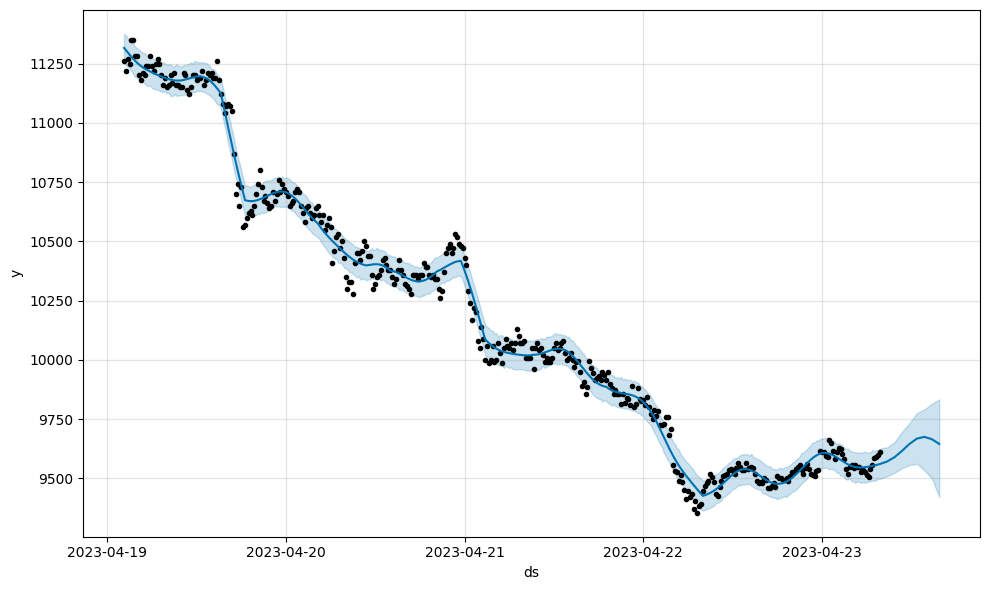

In [157]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


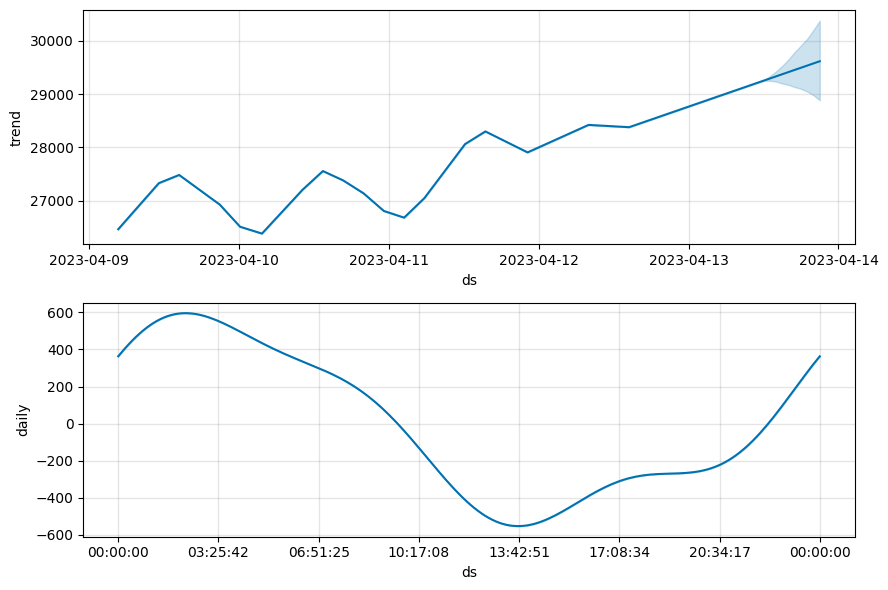

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored